In [ ]:
%pip install matplotlib matplotx requests pandas

In [2]:
%matplotlib inline
import requests, matplotx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

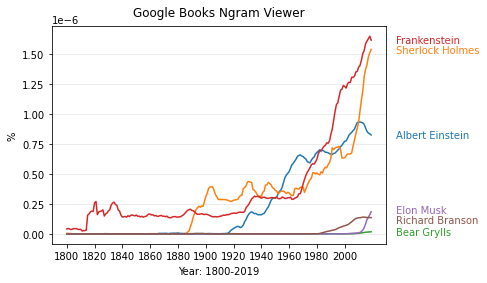

In [4]:
params = {
    "content": "Albert Einstein,Sherlock Holmes,Bear Grylls,Frankenstein,Elon Musk,Richard Branson",
    "year_start": "1800",
    "year_end": "2019"
}

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
}

html = requests.get("https://books.google.com/ngrams/json", params=params, headers=headers, timeout=30).text
time_series = pd.read_json(html, typ="series")

year_values = list(range(int(params['year_start']), int(params['year_end']) + 1))

for series in time_series:
    plt.plot(year_values, series["timeseries"], label=series["ngram"])

plt.title("Google Books Ngram Viewer", pad=10)
matplotx.line_labels()  # https://stackoverflow.com/a/70200546/15164646

plt.xticks(list(range(int(params['year_start']), int(params['year_end']) + 1, 20)))
plt.grid(axis="y", alpha=0.3)

plt.ylabel("%", labelpad=5)
plt.xlabel(f"Year: {params['year_start']}-{params['year_end']}", labelpad=5)
plt.show()